# TP7

## Iniciação

### Objetivo

Estimar qual o faturamento que um jogo terá ao ser comercializado na loja Steam e então avaliar se vale o investimento na produção dele ou não.

### Colunas do dataset original

O dataset utilizado nesse trabalho foi obtido através de consultas via API da loja STEAM e do STEAMSPY,também foram coletados dados via biblioteca de terceiros no HowLongToBeat

|Coluna|Descrição|Tipo|
|------|---------|----|
|appid|Id de identificação na loja steam|Numérico discreto
|name|Nome do jogo|Textual
|scrap_status|Estado do processo de scrap|Textual categórica
|type|Se é um jogo, demo ou dlc|Categorico
|steam_appid|Id de identificação na loja steam, o nome da coluna é diferente quando o dado é extraído via API da steam|Numérico discreto
|required_age|Idade mínima recomendada para o jogo|Numérico discreto
|is_free|Se é um jogo gratuito|Booleano
|short_description|Descrição breve do jogo|Textual
|fullgame|Endereçamento para o jogo completo caso seja uma demo| Dicionário com id e nome do jogo completo
|supported_languages|Lista de linguas suportadas pelo jogo|Textual
|pc_requirements|Dicionário dos requisitos para "rodar" o jogo|Textual
|developers|Nome da desenvolvedora|Textual
|publishers|Nome da publicadora|Textual
|platforms|Dicionário relacionando a plataforma e se o jogo está disponível nela|Booleano
|categories|Dicionário de macro características do jogo|Textual categórica
|release_date|Dicionário relacionando se o jogo já foi lançada e qual a data de lançamento|Temporal
|controller_support|Tipo de suporte a controles|Textual categórica
|positive|Quantidade de avaliações positivas|Numérico discreto
|negative|Quantidade de avaliações negativas|Numérico discreto
|tags|Tags do jogo|Textual categórica
|steamspy_owners|Faixa estimada de proprietários de um jogo|Textual categórica
|spy_status|Estado do processo de scrap dos dados do SteamSpy|Textual categórica
|hltb_status|Estado do processo de scrap dos dados do HowLongToBeat|Textual categórica
|genres|Lista de gêneros do jogo|Textual categórica
|achievements|Quantidade de conquistas e o nome de algumas delas|Numérico discreta e Textual
|price_overview|Dicionário contendo os dados de preço e promoções em dólar|Numérico contínuo
|demos|Endereçamento para a demo caso possua| Dicionário com id e nome da demo
|hltb_id|Id de identificação no HowLongToBeat|Numérico discreto
|hltb_name|Nome do jogo no HowLongToBeat|Textual
|hltb_alias|Apelido do jogo no HowLongToBeat|Textual
|hltb_similarity|Grau de similaridade entre o nome do jogo buscado e o nome do jogo encontrado no HLTB|Numérico contínuo
|hltb_main_story|Duração dos objetivos principais do jogo em hrs|Numérico contínuo
|hltb_main_extra|Duração dos extras do jogo em hrs|Numérico contínuo
|hltb_completionist|Duração dos objetivos principais, extras e outros em hrs|Numérico contínuo
|hltb_all_styles|Duração em hrs levando em consideração todos os tipos de jogadores|Numérico contínuo
|ext_user_account_notice|Desconhecido|Textual
|recommendations|Quantidade de avaliações do jogo na loja steam|Numérico discreto
|metacritic|Nota do jogo no site metacritic|Numérico discreto
|drm_notice|Tipo de DRM do jogo|Textual
|alternate_appid|Desconhecido|Numérico discreto

### Variáveis que foram desconsideradas ao longo da análise


### Carregando o dataset

In [222]:
import pandas as pd

steam_df = pd.read_json('Datasets/SteamDataset_w_HLTB.json')
steam_df.sample(5)

,appid,name,scrap_status,type,steam_appid,required_age,is_free,short_description,fullgame,supported_languages,...,hltb_similarity,hltb_main_story,hltb_main_extra,hltb_completionist,hltb_all_styles,ext_user_account_notice,recommendations,metacritic,drm_notice,alternate_appid
171182,NaN,Koi-Koi Japan : UKIYOE tours Vol.1,Scrap_Sucess,dlc,510610.0,0,0.0,Ukiyoe woodblock prints in Collection mode! &q...,"{'appid': '364930', 'name': 'Koi-Koi Japan [Ha...","English, German, Japanese",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41352,NaN,Samurai Solitaire. Return of the Ronin,Scrap_Sucess,game,2005080.0,0,0.0,Help Ronin return home! Unique solitaire inspi...,NaN,"English, French, Italian, German, Spanish - Sp...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
157945,NaN,Knights of Pen and Paper 2,Scrap_Sucess,game,310060.0,0,0.0,"Prepare to inhabit a world of chivalry, class ...",NaN,"English, French, Italian, German, Spanish - Sp...",...,1.0,8.68,14.84,28.21,16.06,NaN,{'total': 2111},NaN,NaN,NaN
174895,NaN,BANCHOU TACTICS,Scrap_Sucess,game,1981160.0,0,0.0,Banchou Tactics is a strategy turn based role-...,NaN,"English, Simplified Chinese, Japanese, Thai",...,1.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
21442,NaN,ScrewUp Playtest,Scrap_Sucess,game,1712210.0,0,0.0,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
steam_df.shape

(179186, 40)

### Filtragem básica dos dados

|Filtro|Motivo|Observação|
|------|------|-----|
|Ser um jogo|No dataset temos demos, DLCs e aplicativos sem nenhum dado coletado que não são aderentes aos objetivos dessa análise|
|Ter dados coletados do SteamSpy|Parte dos dados necessários para a análise vieram de lá, um jogo sem essas dados não permite que a análise seja feita|É muito incomum um jogo ter dados na steam e não ter nenhum dado no steamSpy|
|Não ser gratuito|O objetivo dessa análise é verificar a viabilidade economica de um jogo premium, ou seja, os jogos gratuitos não são aderentes ao objetivo|
|Jogos já devem ter sido lançados|Jogos não lançados não foram validados junto a público e portanto não possuem dados para serem usados nessa análise|Jogos em acesso antecipado são considerados como lançados|
|Ter tags|Sem tags não é possível estimar a similaridade com as tags alvo||

In [224]:
steam_df_filtered = steam_df[(steam_df['type'] == 'game') & (steam_df['spy_status'] == 'Spy_Scrap_Sucess') & (steam_df['is_free'] == False)
& (steam_df['release_date'].str['coming_soon'] == False) & (steam_df['genres'].notnull()) & (steam_df.tags.str.len() > 0)]

steam_df_filtered.shape

(59183, 40)

## Entendo como alguns filtros afetaram o dataset

In [225]:
steam_df['type'].unique()

array([nan, 'demo', 'game', 'dlc', 'music', 'mod', 'video', 'hardware',
       'episode', 'series', 'advertising', 'movie'], dtype=object)

In [226]:
steam_df[(steam_df['type'] != 'game')]['steam_appid'].count()

65795

In [227]:
steam_df[(steam_df['release_date'].str['coming_soon'] == True)]['steam_appid'].count()

19559

### Jogos sem dados do SteamSpy

In [228]:
steam_df[(steam_df['type'] == 'game') & (steam_df['spy_status'] != 'Spy_Scrap_Sucess')]['steam_appid'].count()

0

Como suspeitado, se um jogo foi encontrado na api da steam, ele está presente no steamSPY

### Jogos sem dados do HLTB

In [229]:
steam_df[(steam_df['type'] == 'game') & (steam_df['spy_status'] == 'Spy_Scrap_Sucess') & (steam_df['hltb_status'] != 'Found') & (steam_df['is_free'] == False) & 
         (steam_df['release_date'].str['coming_soon'] == False)]['steam_appid'].count()

39822

A exigência de ter algum dado de duração nos faz perder uma grande quantidade de jogos, cerca de 40mil, em análises futuras talvez a exigência de duração deva ser minimizada ou utilizada para análises menos críticas

### Jogos sem dados de duração

In [230]:
steam_df[(steam_df['type'] == 'game') & (steam_df['spy_status'] == 'Spy_Scrap_Sucess') & (steam_df['hltb_status'] == 'Found') & (steam_df['is_free'] == False)
& (steam_df['release_date'].str['coming_soon'] == False) & (steam_df['hltb_main_story'] == 0)]['steam_appid'].count()

14320

Devido a necessidade de uma duração, mais de 14mil jogos foram removidos da análise. Tenta preencher as durações deles por inferência de forma assertiva levaria muito tempo sem garantia de trazer retornos satisfatórios para a análise atual

### Jogos com dados de duração provavelmente equivocados que foram ignorados na análise

In [231]:
steam_df[(steam_df['type'] == 'game') & (steam_df['spy_status'] == 'Spy_Scrap_Sucess') & (steam_df['hltb_status'] == 'Found') & (steam_df['is_free'] == False)
& (steam_df['release_date'].str['coming_soon'] == False) & (steam_df['hltb_similarity'] <= 0.9)]['steam_appid'].count()

3714

Uma grata surpresa de que menos de 4mil jogos foram excluídos por terem baixa confiabilidade nos dados de duração

### Jogos gratuitos

In [232]:
steam_df[(steam_df['type'] == 'game') & (steam_df['spy_status'] == 'Spy_Scrap_Sucess') & (steam_df['is_free'] == False)]['steam_appid'].count()

85862

### Jogos sem os valores de genres

In [233]:
steam_df[(steam_df['type'] == 'game') & (steam_df['spy_status'] == 'Spy_Scrap_Sucess') & (steam_df['hltb_status'] == 'Found') & (steam_df['is_free'] == False)
& (steam_df['release_date'].str['coming_soon'] == False) & (steam_df['hltb_similarity'] > 0.9) & (steam_df['hltb_main_story'] > 0) & (steam_df['genres'].isnull())]['steam_appid'].count()

33

O Número de jogos gratuitos é grande, cerca de 85mil, mas não há o que fazer com eles nessa análise

## Seleção, extração e adequação das colunas que serão utilizadas

### Remoção de jogos indesejados e tratamento necessário para criar o dataframe final

Identificando e removendo os acessos antecipados

In [234]:
def IsEarlyAcess(genres):
    '''
    Identifica se um jogo está em early acess através da coluna genres que é uma lista de dicionários de gêneros
    '''
    #print(genres)
    try:
        for g in genres:
            if g['description'] == 'Early Access':
                return True
        return False
    except TypeError as te:
        #estamos partindo do principio que jogos sem gênero não estão em acesso antecipado, isso pode ser mostrar falho posteriormente, mas queremos evitar remover jogos sem necessida baseados em um dado pouco relevante
        return False
    
#Criação de uma coluna que identifica se um jogo está ou não em acesso antecipado
steam_df_filtered = steam_df_filtered.assign(isEarlyAcess = steam_df_filtered['genres'].apply(lambda genres: IsEarlyAcess(genres)))
#Remoção dos jogos em acesso antecipado
steam_df_filtered = steam_df_filtered[(steam_df_filtered['isEarlyAcess'] == False)]

Identificando se há dados no HLTB
|Condição|Motivo|Observação|
|------|------|-----|
|Similaridade de nome superior a 0.9 no HowLongToBeat|A busca de um jogo no HLTB é feita pelo nome, portanto, há risco de que o HLTB retorne um dado pertencente a outro jogo, quanto mais similar o nome do jogo na steam com o encontrado no HLTB maior a probabilidade do dado informado ser pertencente ao jogo correto|
|A duração do jogo ser maior que 0|Nenhum jogo tem duração de 0hrs e 0 minutos|Jogos com duração zerada são jogos pouco populares/interesse de público e portanto ninguém submeteu uma duração no HLTB|
|Ter dados do HowLongToBeat|A duração de um jogo é um dado crítico para essa análise, portanto jogos que não tem esses dados serão desconsiderados num primeiro momento|A maioria dos jogos sem esses dados ou mudaram de nome na loja ou são muito pouco conhecidos/populares|

In [235]:
steam_df_filtered = steam_df_filtered.assign(has_hltb_data = steam_df_filtered['hltb_status'].apply(lambda status: True if status == 'Found' else False))

steam_df_filtered['has_hltb_data'] = (steam_df_filtered['has_hltb_data'] == True) & (steam_df_filtered['hltb_main_story'] > 0) & (steam_df_filtered['hltb_similarity'] > 0.9)

#steam_df_filtered['has_hltb_data']


Criando uma coluna de data de lançamento extraída e convertida para formato de data

In [236]:
steam_df_filtered['release_date_converted'] = pd.to_datetime(steam_df_filtered['release_date'].str['date'].apply(lambda d: None if len(d) == 0 else d[:3] + ' 1, ' + d[4:8] if len(d) <= 8  else d))
steam_df_filtered['release_date_converted'].sample(5)

23694    2021-08-01
113500   2017-09-06
126463   2018-12-20
84975    2020-10-05
148788   2019-07-03
Name: release_date_converted, dtype: datetime64[ns]

### Checagem alguns aspectos de qualidade dos dados

Verificando se algum jogo está com moeda diferente de dólar

In [237]:
#Checando se algum
steam_df_filtered[steam_df_filtered['price_overview'].str['currency'] != 'USD']['price_overview'].unique()

array([nan], dtype=object)

Verificando se algum jogo não tem linguagem suportada

In [238]:
steam_df_filtered[steam_df_filtered['supported_languages'].isna()]

,appid,name,scrap_status,type,steam_appid,required_age,is_free,short_description,fullgame,supported_languages,...,hltb_completionist,hltb_all_styles,ext_user_account_notice,recommendations,metacritic,drm_notice,alternate_appid,isEarlyAcess,has_hltb_data,release_date_converted
3396,NaN,Cute Puzzles!!!,Scrap_Sucess,game,2415180.0,0,0.0,"Cute Puzzles!!! The game is very simple, you h...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,2023-05-16
16038,NaN,Sky DarkCrow,Scrap_Sucess,game,1785560.0,0,0.0,Crow has to defeat enemies and collect coins a...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,2021-11-29
44685,NaN,Bitch demon twins,Scrap_Sucess,game,1957650.0,0,0.0,"Short sketch action game. Even if it dies, as ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,2022-05-11
52214,NaN,NekoBellow,Scrap_Sucess,game,2243230.0,0,0.0,NekoBellow is a 2D Bullet Hell Side Scrolling ...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,2023-01-18
61687,NaN,A Raving Lunatic,Scrap_Sucess,game,2349660.0,0,0.0,This is a role-playing game. As our protagonis...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,2023-05-08
76640,NaN,Primal Carnage: Extinction - Workshop Tool,Scrap_Sucess,game,1366270.0,0,0.0,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,2020-07-17
94158,NaN,SNUSE 221,Scrap_Sucess,game,948070.0,0,0.0,Hey. My name is *&amp;#!$. Today I will tell y...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,2019-04-02
103651,NaN,WIDECROSS,Scrap_Sucess,game,803800.0,0,0.0,Wide Cross is a quick paced and easy-going MOB...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,2019-11-26
103654,NaN,It Could Have Been Me,Scrap_Sucess,game,803840.0,0,0.0,A journey from Afganistan to Sweden. Experienc...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,2019-05-19
113513,NaN,Numberline 2,Scrap_Sucess,game,654970.0,0,0.0,NumberLine 2 is the continuation of the popula...,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,False,False,2017-07-14


### Colunas que serão utilizadas

|Coluna|Descrição|Tipo|Motivo|Obtenção|
|------|---------|----|------|--------|
|id|Id do jogo na loja steam|Numérico discreto|Caso seja necessário pegar mais dados do dataset original, o ID é uma melhor escolha que |Copiar coluna steam_appid do dataset|
|name|Nome do jogo|Textual|Melhorar a visualização/diferenciação de um jogo pro outro|Copiar coluna name do dataset|
|price|Preço não promocional do jogo em dólar|Numérico contínuo|Será um dos dados da regressão|Extraído da coluna price_overview do datataset|
|total_duration|Duração dos objetivos principais do jogo em hrs|Numérico contínuo|Será um dos dados da regressão|Copiado da coluna hltb_main_story|
|commercialization_days|Total de dias em que o jogo esteve sendo comercializado|Numérico discreto|Será um dos dados da regressão|Extraído da coluna release_date e calcular os dias que se passaram até o dia 08/11/2023
|total_reviews|Total de avaliações que o jogo recebeu|Numérico discreto|Será um dos dados da regressão|Soma das colunas positive e negative do dataset|
|positive_reviews_percent|Porcentagem de avaliações positivas|Numérica contínua|Forma de medir a aceitação dos jogadores|Divisão da coluna positive por total_reviews|
|self_published|Identifica se o jogo foi publicado pela própria desenvolvedora|Numérico discreto|Identificar o impacto ter uma publicadora por trás de um jogo|Verificando se a coluna developers é igual a coluna publisher|
|tag_similarity|Porcentagem de similaridade entre as tags dos jogos e as tags referência|Numérica contínua|Identificar como a classificação do jogo influência na sua performance comercial|Comparar a lista de tags referência com a coluna tags|
|total_supported_languages|Quantidade de idiomas que um jogo dá suporte|Numérico discreto|Aferir se ter suporte a mais idiomas resulta em melhor performance comercial|Contar a quantidade de idiomas em supported_languages|
|has_hltb_data|Se há dados de duração para o jogo|Numérico discreto|Averiguar que variáveis influenciam em o jogo ter dados de duração no HLTB|Verificando se a total duration é maior que zero e verificando o status na coluna hltb_status|

### Criação das colunas e aplicação de filtros adicionais

Essa filtragem visa simular as opções de filtro que serão disponibilizadas no dashboard final

|Filtro|Descrição|Objetivo|
|------|---------|--------|
|min_price   |Define o preço mínimo de um jogo   |Criar um grupo de análise mais similar ao jogo que deseja-se prever   |
|max_price   |Define o preço máximo de um jogo   |Criar um grupo de análise mais similar ao jogo que deseja-se prever   |
|min_commercialization_days   |Define o tempo mínimo em dias que um jogo precisa estar em comercialização   |Eliminar jogos muito recentes e/ou selecionar uma época específica para analisar   |
|max_commercialization_days   |Define o tempo máximo em dias que um jogo precisa estar em comercialização   |Utilizar dados mais atuais, portanto, refletindo mais o momento presente   |
|target_category   |Define a categoria a qual o jogo precisa pertencer, normalmente pode ser 'Single-player', 'Multi-player' e 'Co-op'   |Criar um grupo de análise mais similar ao jogo que deseja-se prever   |
|target_tags   |Define as tags do jogo que deseja-se prever, é uma forma de descrever e comparar jogos de forma mais objetiva e analisável   |Será utilizado para gerar a coluna tag_similarity que será filtrada pelo min_tag_similarity   |
|min_tag_similarity   |Pode-se entender como o grau de similaridade entre o jogo que deseja-se prever com os demais jogos da loja   |Criar um grupo de análise mais similar ao jogo que deseja-se prever   |
|target_reviews   |De forma bem simplificada, é possível prever as vendas através do total_reviews, portanto esse filtro é utilizado para informar o sucesso financeiro ideal para o projeto   |Eliminar outliers que performaram muito abaixo ou muito acima da meta fiscal   |
|target_reviews_range   |Multiplica e divide o target_reviews para criar uma amplitudade de variação dentro da meta   |Coletar uma fatia de jogos que representem melhor a realidade que se deseja alcançar/prever   |
|min_positive_reviews_percent   |Define o mínimo de aceitação do público de um jogo para a coluna positive_reviews_percent   |Criar um grupo de análise mais similar ao jogo que deseja-se prever   |
|max_supported_languages   |Define a quantidade máxima de linguagens que um jogo dá suporte   |Eliminar outliers da coluna total_supported_languages   |


In [239]:
min_price = 4.99
max_price = 29.99

min_commercialization_days = 0
max_commercialization_days = 1095

target_category = 'Single-player'

target_tags = ['Top-Down','Roguelite','Loot','Action','Shooter']#'Roguelike','Bullet']
#target_tags = ['Turn-Based','Tactics','RPG','Pixel','Creature','2D']

target_reviews = 650
target_reviews_range = 5

max_supported_languages = 12

min_positive_reviews_percent = 0.5

min_tag_similarity = 0.4


Removendo jogos fora da faixa de preço alvo

In [240]:
#O valor initial é o valor normal de um jogo, mas por algum motivo ele não vem com as casas decinais da API por isso é dividido por 100
steam_df_filtered['price'] = steam_df_filtered['price_overview'].str['initial']/100

steam_df_filtered = steam_df_filtered[(steam_df_filtered.price >= min_price) & (steam_df_filtered.price <= max_price)]

Removendo jogos com tempo de comercialização fora da faixa alvo

In [241]:
steam_df_filtered['commercialization_days'] = (pd.Timestamp('2023/11/08') - steam_df_filtered['release_date_converted']).dt.days

steam_df_filtered = steam_df_filtered[(steam_df_filtered.commercialization_days >= min_commercialization_days) & (steam_df_filtered.commercialization_days <= max_commercialization_days)]

Remoção dos jogos que não são Single-Player

In [242]:
def ContainsTargetCategory(categories):
    try:
        for category in categories:
            for value in category.values():
                if value == target_category:
                    return True
        return False
    except TypeError as te:
        #o jogo não possui categorias
        return False

steam_df_filtered = steam_df_filtered[steam_df_filtered.categories.apply(lambda s : ContainsTargetCategory(s))]

Removendo jogos fora do range de reviews

In [243]:
steam_df_filtered['total_reviews'] = steam_df_filtered['positive'].copy() + steam_df_filtered['negative'].copy()

steam_df_filtered = steam_df_filtered[steam_df_filtered['total_reviews'] < target_reviews*target_reviews_range]
steam_df_filtered = steam_df_filtered[steam_df_filtered['total_reviews'] > target_reviews/target_reviews_range]

Removendo jogos com excesso de linguagens suportadas

In [244]:
steam_df_filtered['total_supported_languages'] = steam_df_filtered.supported_languages.str.split(',')
steam_df_filtered['total_supported_languages'] = steam_df_filtered['total_supported_languages'].fillna('')
steam_df_filtered['total_supported_languages'] = steam_df_filtered['total_supported_languages'].apply(lambda languages: len(languages))

steam_df_filtered = steam_df_filtered[steam_df_filtered['total_supported_languages'] <= max_supported_languages]

Removendo jogos com reviews positivas inferiores ao filtro

In [245]:
steam_df_filtered['positive_reviews_percent'] = steam_df_filtered['positive'].copy()/steam_df_filtered['total_reviews']

steam_df_filtered = steam_df_filtered[steam_df_filtered['positive_reviews_percent'] >= min_positive_reviews_percent]

Criando a coluna de similaridade e removendo jogos com pouca similaridade com o jogo alvo

In [246]:
similarityPerTag = 1/len(target_tags)

def GetTagSimilatiry(tags):
    target_tags_list = target_tags.copy()
    similarity = 0
    for tag in tags.keys():
        for t_tag in target_tags:
            if t_tag in target_tags_list and t_tag in tag:
                similarity += similarityPerTag
                target_tags_list.remove(t_tag)
    return similarity


steam_df_filtered['tag_similarity'] = steam_df_filtered['tags'].apply(lambda tags: GetTagSimilatiry(tags))

steam_df_filtered['tag_similarity'].unique()

array([0. , 0.4, 0.6, 0.2, 0.8])

In [247]:
steam_df_filtered = steam_df_filtered[steam_df_filtered['tag_similarity'] >= min_tag_similarity]

Amostras restantes

In [248]:
steam_df_filtered.shape

(311, 49)

Criação do Dataset que será trabalhado

In [249]:
def Is_sef_published(developers,publishers):
    try:
        publisherPercent = 1/len(publishers)
        totalPublisher = 0
        for developer in developers:
            for publisher in publishers:
                if developer.strip() == publisher.strip():
                    totalPublisher += publisherPercent
        return totalPublisher
    except TypeError as te:
        #print(te)
        #Ocorre quando não há dado de publicadora e/ou desenvolvedor (Nan)
        return 0
        #print(developers)
        #print(publishers)

In [250]:
main_df = pd.DataFrame()
main_df['id'] =  steam_df_filtered['steam_appid'].copy()
main_df['name'] = steam_df_filtered['name'].copy()
main_df['price'] = steam_df_filtered['price'].copy()
main_df['total_duration'] = steam_df_filtered['hltb_main_story'].copy()

main_df['commercialization_days'] = steam_df_filtered['commercialization_days'].copy()
main_df['total_reviews'] = steam_df_filtered['total_reviews'].copy()
main_df['positive_reviews_percent'] = steam_df_filtered['positive'].copy()/steam_df_filtered['total_reviews']

#main_df['self_published'] = (steam_df_filtered['developers'] == steam_df_filtered.publishers) # Como resolver?
main_df['self_published_percent'] = steam_df_filtered.apply(lambda x: Is_sef_published(x.developers,x.publishers),axis=1)

main_df['developers'] = steam_df_filtered['developers'].copy()
main_df['publishers'] = steam_df_filtered['publishers'].copy()

main_df['tag_similarity'] = steam_df_filtered['tag_similarity'].copy()
main_df['total_supported_languages'] = steam_df_filtered['total_supported_languages'].copy()

main_df['has_hltb_data'] = steam_df_filtered['has_hltb_data'].copy()


In [251]:
main_df.reset_index(inplace=True,drop=True)

In [252]:
main_df.sample(5)

,id,name,price,total_duration,commercialization_days,total_reviews,positive_reviews_percent,self_published_percent,developers,publishers,tag_similarity,total_supported_languages,has_hltb_data
72,1950440.0,Mage and Monsters,4.99,0.00,392.0,752.0,0.904255,1.0,[Lasse Zacho Malver],[Lasse Zacho Malver],0.4,2,False
254,1636030.0,Crossfire: Sierra Squad,26.99,5.00,7.0,266.0,0.650376,1.0,[Smilegate Entertainment],[Smilegate Entertainment],0.4,12,True
188,724000.0,Uragun,9.99,9.00,223.0,167.0,0.772455,1.0,[Kool2Play],[Kool2Play],0.6,10,True
146,1277500.0,Skeletal Avenger,16.99,7.93,770.0,215.0,0.809302,1.0,[10tons Ltd],[10tons Ltd],0.4,10,True
162,1175460.0,Revita,16.99,9.28,586.0,1883.0,0.830058,0.0,[BenStar],"[Dear Villagers, Doyoyo Games]",0.6,7,True


In [253]:
main_df.shape

(311, 13)

## Dados faltantes identificados

| Coluna | Identificação | Motivo | Decisão
|--------|---------------|--------|---------|
|genres|Erro ao tentar percorrer os gêneros na tentativa de identificar se o jogo está ou não em acesso antecipado|Não conhecido até o momento|Inicialmente não seriam removidos, mas foram encontrados durante jogos em acesso antecipado sem a coluna genre, portanto, foi decidido remover todos os jogos sem valores em genres|
|hltb_main_story|No .sample() foi observado algumas durações com valor 0, mas como nenhum jogo pode ter duração 0, é totalmente razoável assumir que isso é um dado faltante|Normalmente são jogos pouco populares e portanto ninguém postou essa informação no site|Pela importância desse dado para a análise em questão, serão removidos jogos com duração zerada|
|release_date|Ao tentar passar a release_date para formato de data ocorria erros de formato indicando uma entrada sem dia, após uma pequena análise foram identificados outras entradas do mesmo jeito|Alguns jogos por motivos não totalmente compreendidos não possuem dia de lançamento, apenas mês e ano|Será inferido que eles foram lançados no dia 15 do mês e ano que já temos, é esperado que alguns dias de discrepância (+ ou - 15 dias) no tempo de comercialização não acarrete em grandes impactos na análise em andamanto  
|required_age|No .sample() foi observado muitas idades mínimas com valor 0, suspeitando do grau de incidência foi feita uma contagem mostrando uma predominância imensa de idade mínima 0, o que não parece condizer com a realidade|Provavelmente esse dado só é crítico de ser colocado na loja para jogos de conteúdo adulto e/ou violento, portanto é muito negligêncido|A coluna min_age inicialmente prevista será desconsiderada pois há dados faltantes demais|
|tags|No .sample() foi observado foi observado algumas entradas de tag com uma lista vazia|Não conhecido até o momento, suspeita-se de que jogos de baixa popularidade sofram dessa falta de dados|Ou serão ignorados para acelerar uma análise preliminar ou o dado será obtido através de um webscrapping da frontpage da loja steam|
|price|Ao usar um describe na coluna foi observado uma contagem inferior ao esperado|Aparentemente se tratam de jogos por assinatura ou que não estão mais disponíveis para compra na loja|Por serem menos de 200 jogos, serão removidos em um primeiro momento
|commercialization_days|Ao usar um describe na coluna foi observado uma contagem inferior ao esperado|Não está claro o porque de alguns jogos não terem informação de data de lançamento|Por serem menos de 31 jogos, serão removidos em um primeiro momento
|supported_languages|Um jogo não possuia nenhuma linguagem suportada|Desconhecido|Substituir por zero|

### Tratando os jogos sem dados de preço

In [254]:
main_df['price'].isna().sum()

0

In [255]:
main_df[main_df['price'].isna()]

,id,name,price,total_duration,commercialization_days,total_reviews,positive_reviews_percent,self_published_percent,developers,publishers,tag_similarity,total_supported_languages,has_hltb_data


In [256]:
main_df = main_df[main_df['price'].notna()]

### Tratando os jogos sem dados de dias de comercialização

In [257]:
main_df['commercialization_days'].isna().sum()

0

In [258]:
main_df[main_df['commercialization_days'].isna()]

,id,name,price,total_duration,commercialization_days,total_reviews,positive_reviews_percent,self_published_percent,developers,publishers,tag_similarity,total_supported_languages,has_hltb_data


In [259]:
main_df = main_df[main_df['commercialization_days'].notna()]

In [260]:
main_df[main_df['commercialization_days'] < 0]

,id,name,price,total_duration,commercialization_days,total_reviews,positive_reviews_percent,self_published_percent,developers,publishers,tag_similarity,total_supported_languages,has_hltb_data


## Análise do dataset resultante

### Describe dos dados

In [261]:
main_df.shape

(311, 13)

In [262]:
columns = ['total_reviews','price','commercialization_days','positive_reviews_percent','self_published_percent','tag_similarity','total_supported_languages','has_hltb_data']

In [263]:
main_df[columns].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,total_reviews,price,commercialization_days,positive_reviews_percent,self_published_percent,tag_similarity,total_supported_languages
count,311,311,311,311,311,311,311
mean,764.572,15.8124,501.743,0.833402,0.536977,0.454019,5.56913
std,759.86,6.72098,312.344,0.108651,0.486529,0.106142,3.90296
min,131,4.99,7,0.504839,0,0.4,1
25%,205.5,9.99,216.5,0.772257,0,0.4,1
50%,416,14.99,506,0.851005,1,0.4,5
75%,1085.5,19.99,766.5,0.919857,1,0.4,9
max,3155,29.99,1093,1,1,0.8,12


Apartir do describe do dataset resultante, podemos imaginar de que há a presença de alguns outliers de alto valor na coluna total_reviews, levando a uma assimetria a direita. Nas demais colunas já temos bem menos distorções, contudo o desvio padrão é quase sempre bem elevado, indicando uma grande dispersão dos valores

### Escalonamento e Normalização os dados

In [264]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for column in columns:
    if (column == 'total_reviews'):
        continue
    main_df[column] = scaler.fit_transform(main_df[[column]])

main_df.describe()


,id,price,total_duration,commercialization_days,total_reviews,positive_reviews_percent,self_published_percent,tag_similarity,total_supported_languages,has_hltb_data
count,3.110000e+02,311.000000,254.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,1.465368e+06,0.432898,5.395236,0.455564,764.572347,0.663548,0.536977,0.135048,0.415376,0.569132
std,4.633240e+05,0.268839,6.985944,0.287610,759.860234,0.219425,0.486529,0.265354,0.354815,0.495996
min,1.155000e+04,0.000000,0.000000,0.000000,131.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.152085e+06,0.200000,0.000000,0.192910,205.500000,0.540063,0.000000,0.000000,0.000000,0.000000
50%,1.454010e+06,0.400000,3.675000,0.459484,416.000000,0.699098,1.000000,0.000000,0.363636,1.000000
75%,1.772870e+06,0.600000,7.982500,0.699355,1085.500000,0.838148,1.000000,0.000000,0.727273,1.000000
max,2.618840e+06,1.000000,54.570000,1.000000,3155.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [265]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(main_df[columns])
main_df[columns] = scaler.transform(main_df[columns])

main_df.describe()

,id,price,total_duration,commercialization_days,total_reviews,positive_reviews_percent,self_published_percent,tag_similarity,total_supported_languages,has_hltb_data
count,3.110000e+02,3.110000e+02,254.000000,3.110000e+02,311.000000,3.110000e+02,3.110000e+02,3.110000e+02,3.110000e+02,3.110000e+02
mean,1.465368e+06,-9.138813e-17,5.395236,1.713527e-16,0.000000,2.513174e-16,1.256587e-16,2.284703e-17,-1.142352e-16,1.713527e-17
std,4.633240e+05,1.001612e+00,6.985944,1.001612e+00,1.001612,1.001612e+00,1.001612e+00,1.001612e+00,1.001612e+00,1.001612e+00
min,1.155000e+04,-1.612844e+00,0.000000,-1.586518e+00,-0.835145,-3.028911e+00,-1.105469e+00,-5.097560e-01,-1.172570e+00,-1.149302e+00
25%,1.152085e+06,-8.677053e-01,0.000000,-9.147031e-01,-0.736943,-5.636763e-01,-1.105469e+00,-5.097560e-01,-1.172570e+00,-1.149302e+00
50%,1.454010e+06,-1.225669e-01,3.675000,1.365190e-02,-0.459471,1.622727e-01,9.532186e-01,-5.097560e-01,-1.460555e-01,8.700932e-01
75%,1.772870e+06,6.225716e-01,7.982500,8.490111e-01,0.423032,7.969989e-01,9.532186e-01,-5.097560e-01,8.804589e-01,8.700932e-01
max,2.618840e+06,2.112848e+00,54.570000,1.896016e+00,3.150948,1.535806e+00,9.532186e-01,3.264866e+00,1.650345e+00,8.700932e-01


### Visualização gráfica

In [266]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.set_style({'axes.labelcolor':'black','axes.facecolor':'white'})
sb.set_context({'font.size':15})

[]

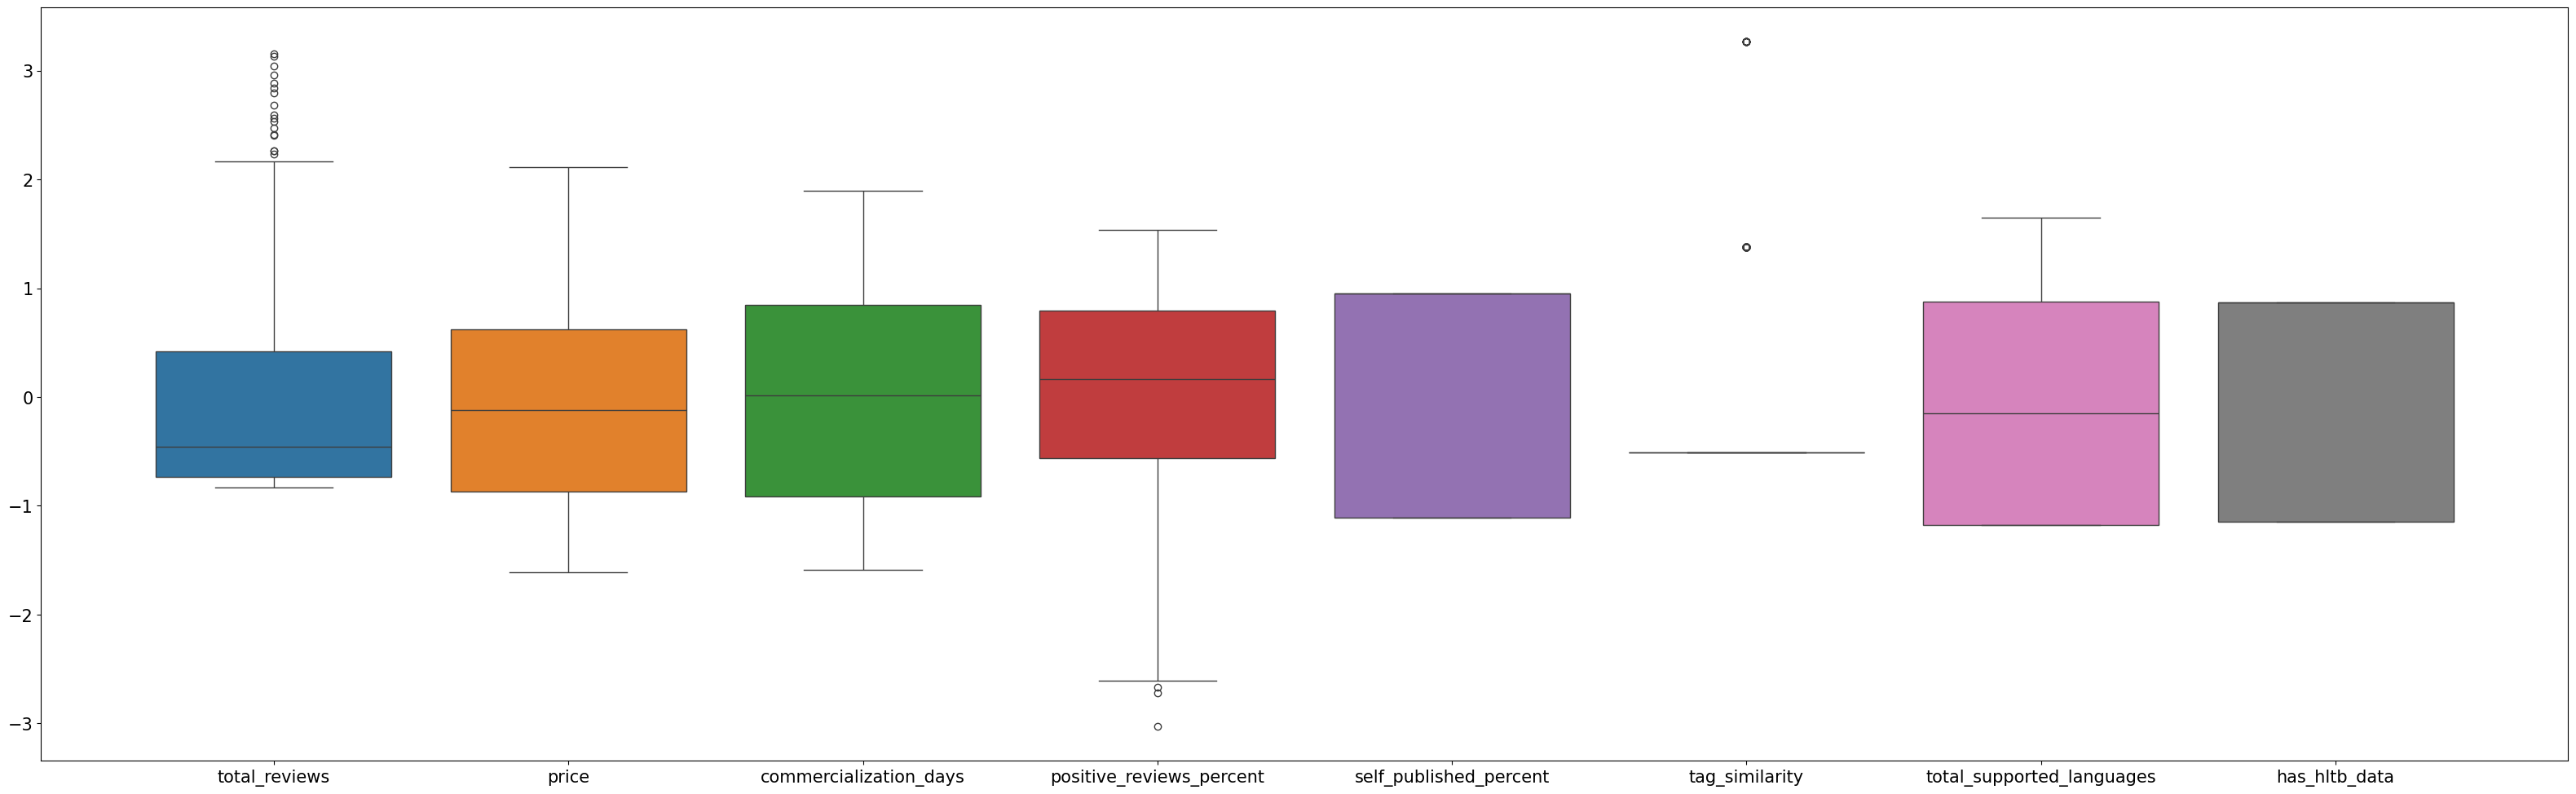

In [267]:
fig, axs = plt.subplots(1,1,figsize=[40,12])

sb.boxplot(main_df[columns])
#for index,ax in enumerate(axs):
    #sb.boxplot(main_df[columns[index]],ax=axs[index])

plt.plot()

Como especulado pelo describe, realmente há alguns outliers na variável total_reviews, contudo, graças aos filtros aplicados, foi possível reduzir expressivamente a quantidade de outliers nas demais colunas

<Axes: >

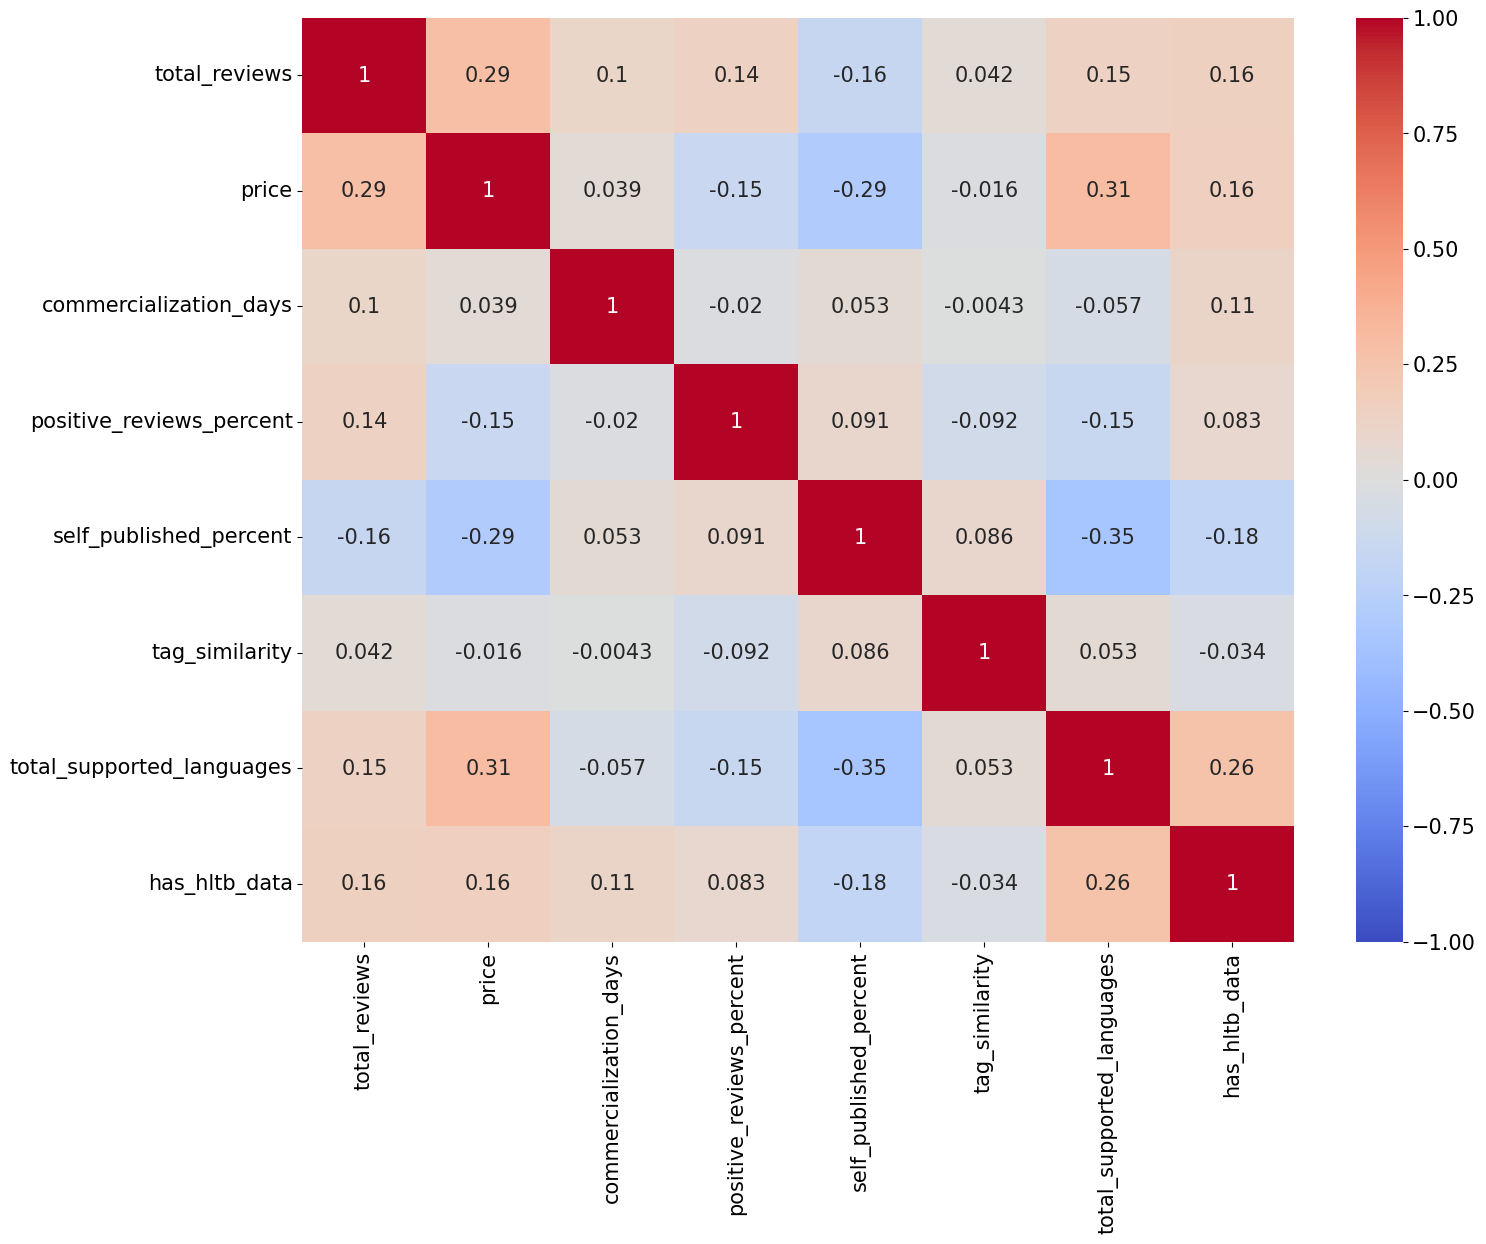

In [268]:
fig, ax = plt.subplots(figsize = [16,12])

sb.heatmap(main_df[columns].corr(),annot=True,vmin=-1, vmax=1,cmap=sb.color_palette("coolwarm", as_cmap=True),ax=ax)
#ax.tick_params('x',rotation=45)

- A baixa correlação entre total_reviews e commercialization_days foi uma surpresa, tendo em vista que é razoável pensar que mais tempo em comercialização mais vendas seriam feitas (partindo da premissa que mais reviews é igual a mais vendas), contudo, os resultados da análise indicam que há um certo "limbo" na loja steam

- A correlação entre price e total_reviews pode ser explicada com a tese de que jogos de maior preço tiveram um maior orçamento de produção e isso leva a um maior orçamento de publicidade/marketing, elevando assim suas vendas

- A correlação de total_supported_languages com o preço não é uma correlação estranha, pois, o custo de localizar para mais idiomas precisa ser repassado para o consumidor

- A última correlação interessante, apesar de sútil, é o preço e duração com a quantidade de reviews, acredito que essa leve correlação venha de jogos com maior orçamento, que normalmente aplicam parte de seu orçamento em marketing/publicidade.

- É um tanto surpreendente que a "qualidade" de um jogo influêncie "pouco" no seu desempenho comercial, essa percepção é observável pela correção das colunas positive_reviews_percent com total_reviews

- É indicado que auto publicação acarreta em menos vendas, contudo, a correlação seria menor que o esperado, levando em conta a participação que as publicadoras pegam +/- 50% da receita das vendas

- No caso da similaridade de tag não foi observado grande impacto nas vendas para o jogo analisado

[]

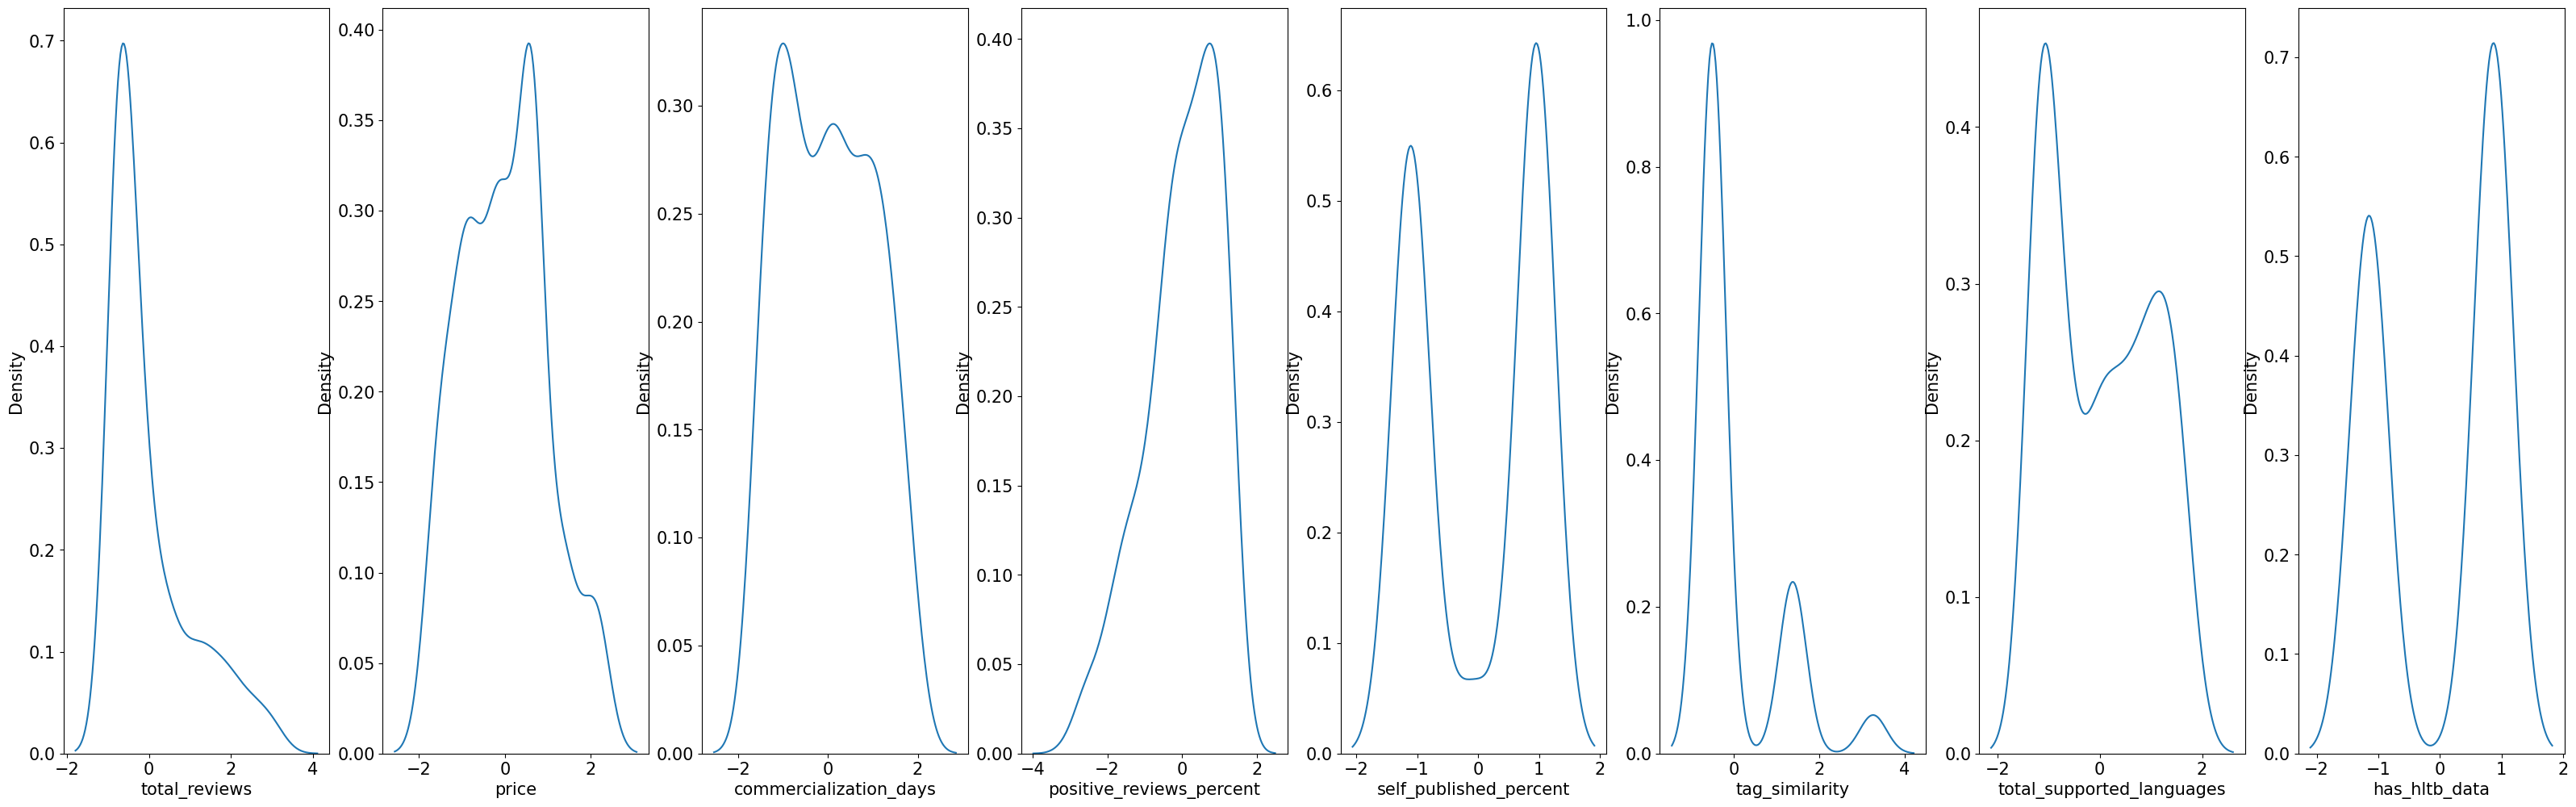

In [269]:
fig, axs = plt.subplots(1,len(columns),figsize=[40,12])

for index,ax in enumerate(axs):
    sb.kdeplot(main_df[columns[index]],ax=axs[index])
    
plt.plot()

[]

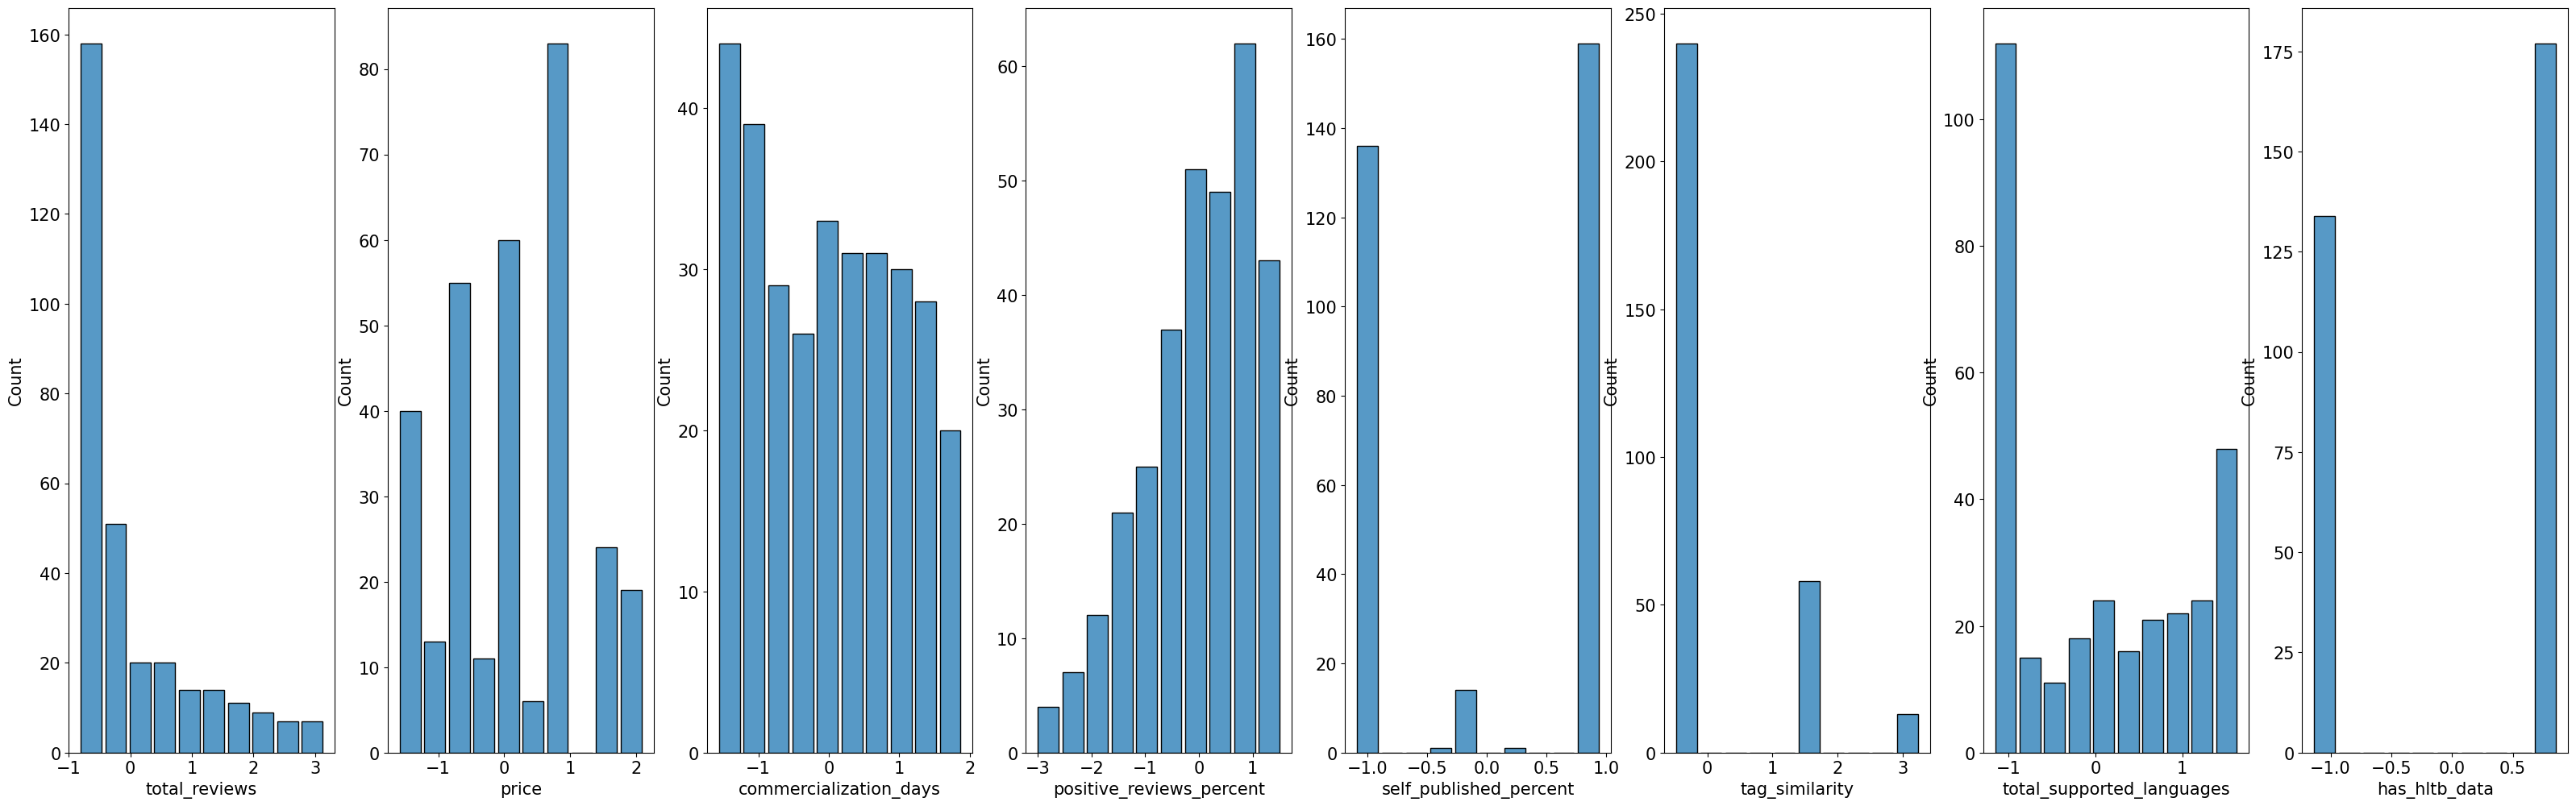

In [270]:
fig, axs = plt.subplots(1,len(columns),figsize=[40,12])

for index,ax in enumerate(axs):
    sb.histplot(main_df[columns[index]],ax=axs[index],bins=10,shrink=0.85)

plt.plot()

Total_reviews: Há muitos jogos com poucos reviews 

Price: Há uma boa distribuição dos jogos ao longo dos preços

Commercialization_days: Aparenta ter um aumento de quantidade de jogos lançados dentro das especificações apresentas

Positive_reviews_percent: Pode-se especular que ou um jogo tem ótimas reviews ou ele afunda, não apresentando muito meio termos

Self_published_percent: Apresenta um comportamento mais booleano, ou é auto publicado totalmente ou é publicado exclusivamente por uma publicadora

Tag_similarity: Temos poucos jogos com alta similaridade ao jogo avaliado, mas dado os filtros aplicados isso não é um problema

Total_supported_languages: Muitos jogos tem poucas linguagens, provavelmente as principais (inglês, espanhol e etc)

Has_HLTB_data: Nenhuma surpresa pois é uma variável originalmente booleana

[]

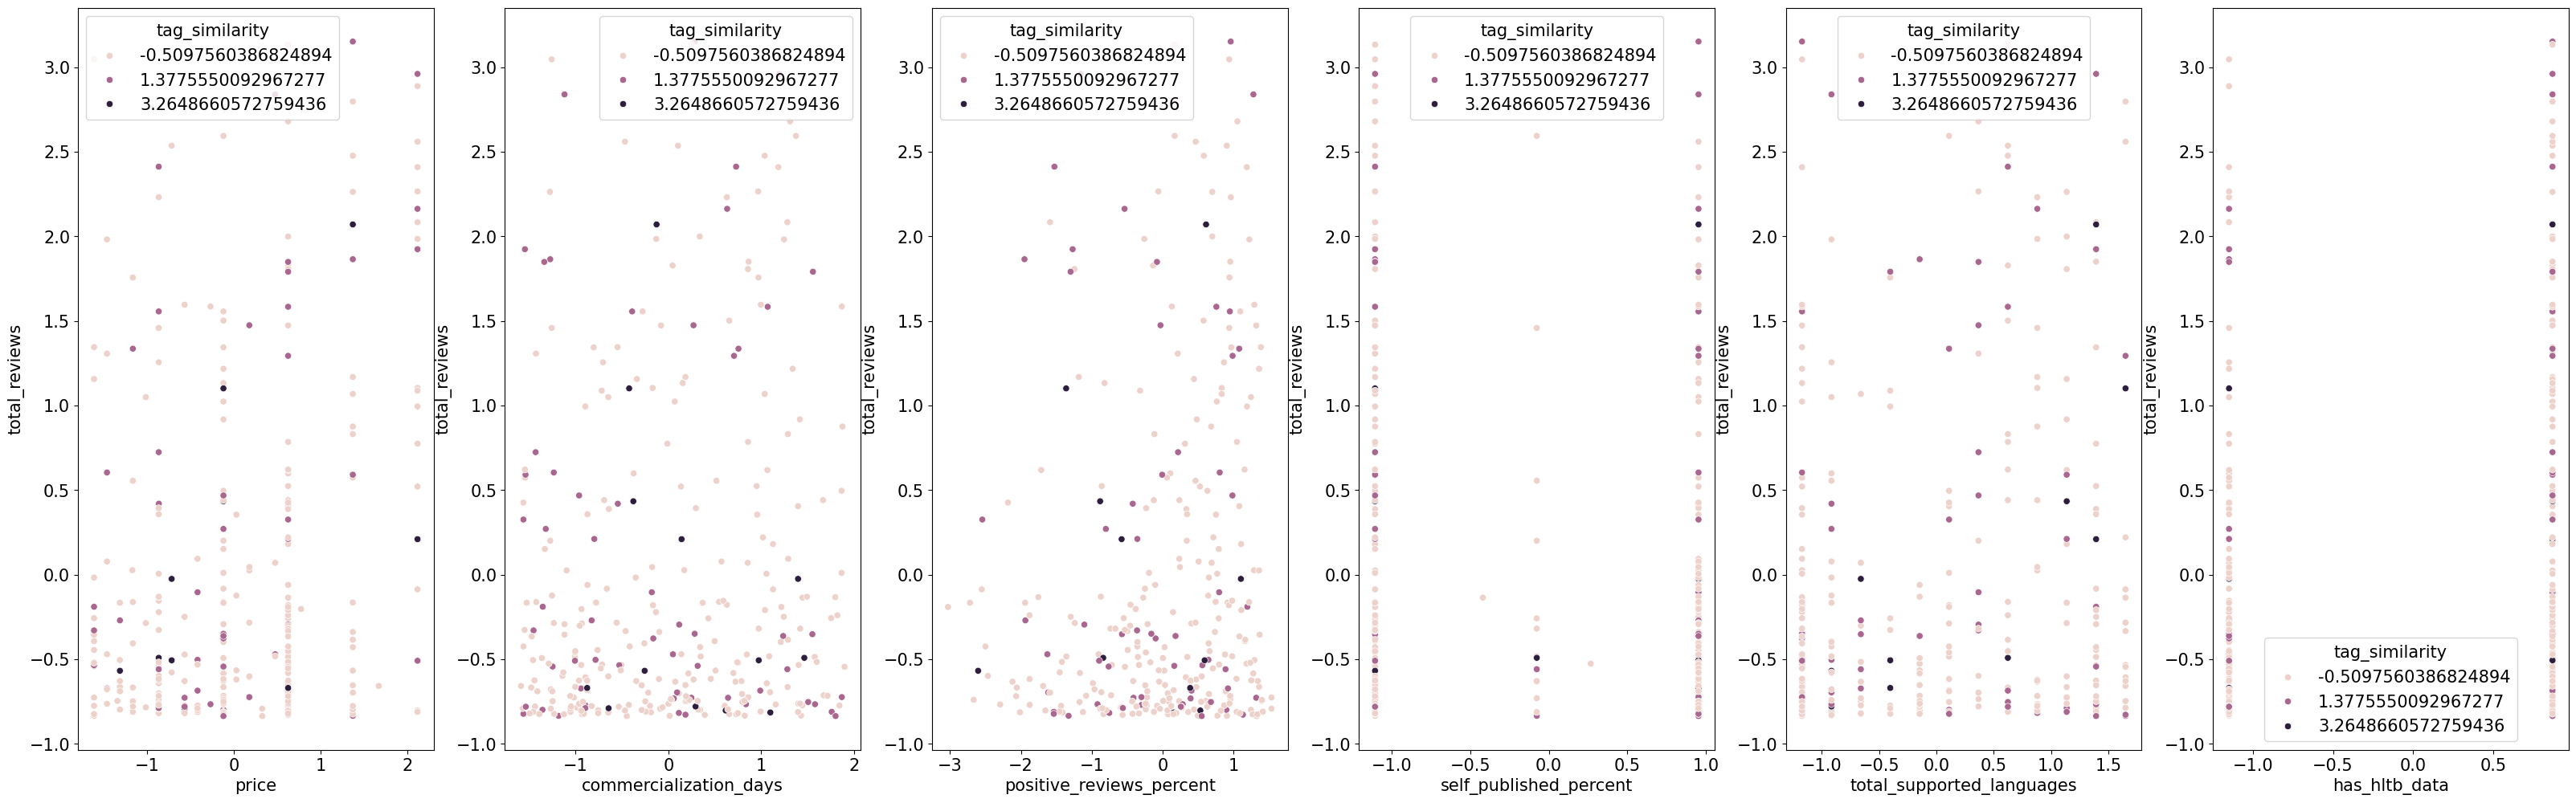

In [271]:
fig, axs = plt.subplots(1,len(columns)-2,figsize=[40,12])

newCol = columns.copy()
newCol.remove('total_reviews')
newCol.remove('tag_similarity')

for index,ax in enumerate(axs):
    sb.scatterplot(main_df,x=newCol[index],y='total_reviews',hue='tag_similarity',ax=axs[index])

plt.plot()

Os gráficos de disperção não mostram nenhuma surpresa perceptível

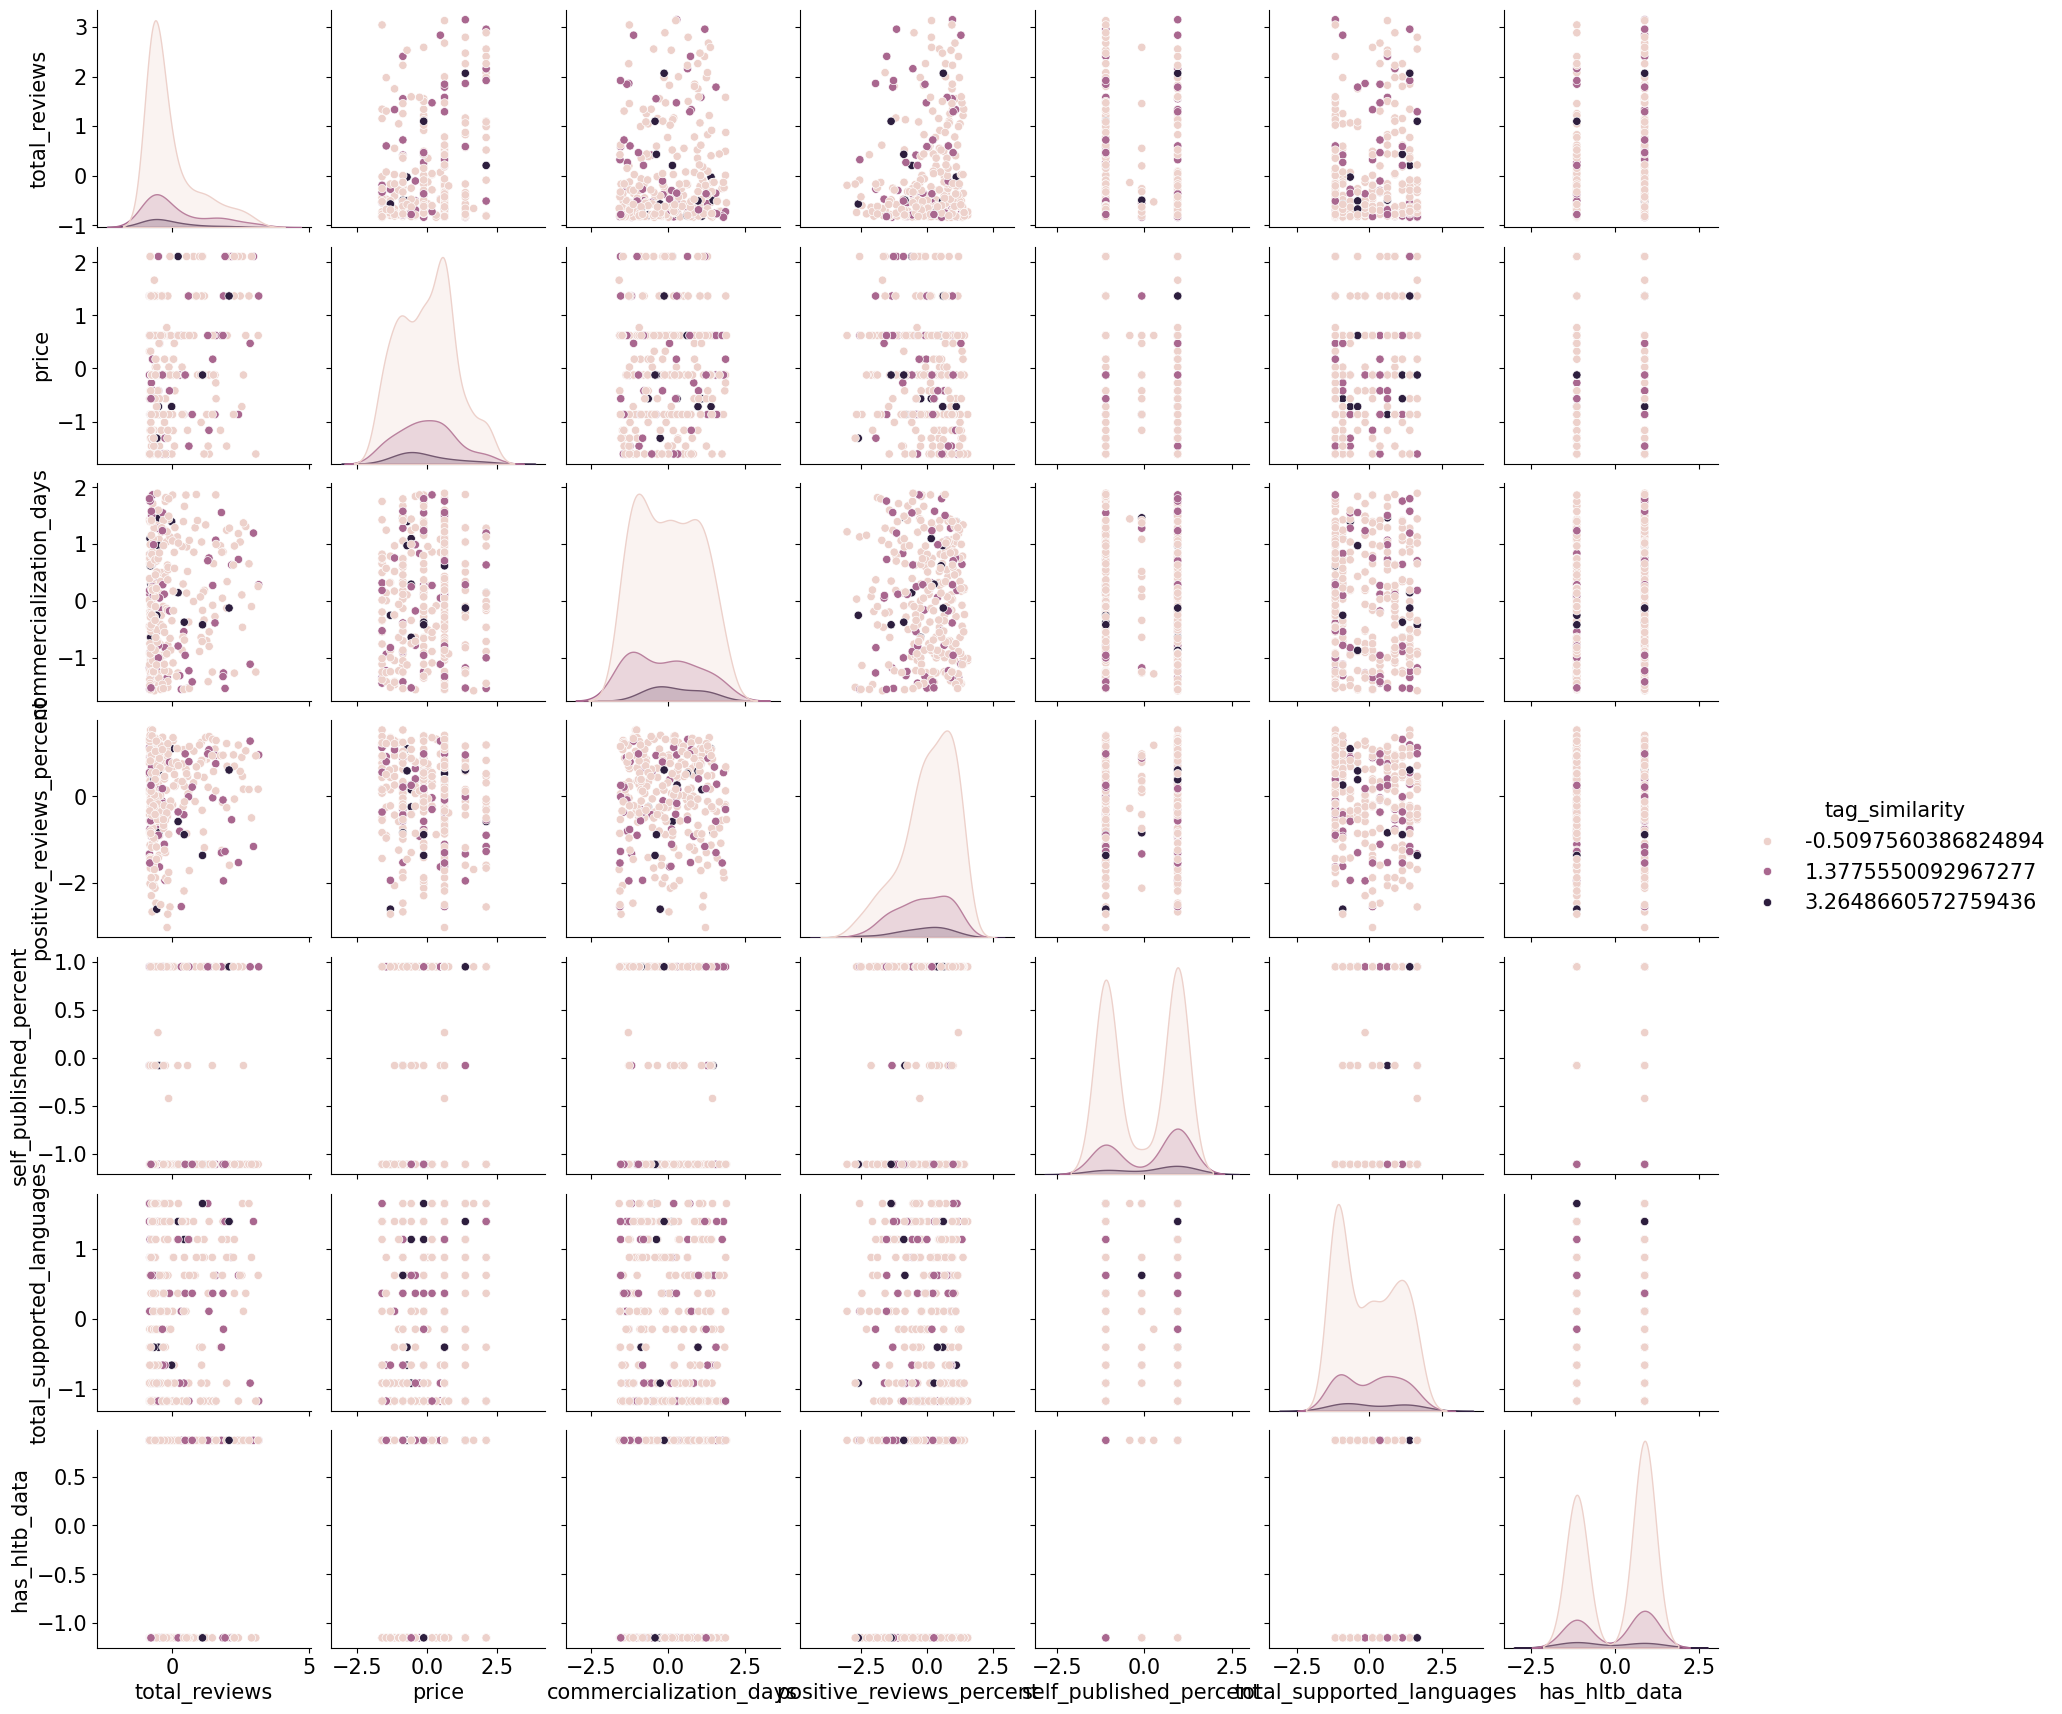

In [272]:
sb.pairplot(main_df[columns],hue='tag_similarity')

## Problemas na base e dimensões de qualidade afetadas

|Problema|Dimensões de qualidade afetados|
|--------|-------------------------------|
|Muitos jogos receberam um dado equivocado de duração vinda do HowLongToBeat (HLTB), para minimizar isso foi estabelecido que a similaridade do nome pesquisado com o resultado deve ser maior que 90%, aplicar um filtro 100% poderia remover vários títulos que estão com os dados corretos mas que por mudanças de nome na loja não tem um nome perfeitamente igual ao presente no HLTB|Confiabilidade|
|Vários jogos até possuem cadastro no HLTB mas ninguém submeteu durações para eles, o que irá inutilizar a análise pois nenhum jogo tem duração zero, portanto foi imposto que a duração deve no mínimo superior a zero para ser um jogo válida para essa análise|Completude|
|Foi identificado que alguns jogos não possuem dia de lançamento, foi inferido o dia 15, pois limitaria o erro em + ou - 15 dias|Integridade|
|Constatado também que jogos que não estão mais disponíveis na loja, não possuem uma data de lançamento, serão excluídos pois não se sabe a data em que foram excluídos|Integridade|
|Inconsistência nas reviews de um jogo, os dados do steamSPY apontam um valor e a api da Steam outro, foi escolhido seguir com os dados do SteamSpy pois refletem os dados na front page da loja|Consistência|
|Alguns jogos, cerca de 20 possuem tempo de comercialização negativo pois os dados foram coletados ao longo de 10 dias, usar a data de quando a coleta foi finalizada resolveria o problema|Atualidade|
|O nome da publicadora ter um espaço de diferença em relação ao mesmo nome na coluna desenvolvedor, a forma de definir se um jogo foi autopublicado terá de ser refinada|Consistência|
|Presença de muitos outliers e de jogos que não tem absolutamente nada semelhante com o projeto que estamos tentando prever a perfomance, para resolver o problema foram aplicados filtros análogos aos que estarão presentes no dashboard desse estudo|Relevância|